# データのインポート

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [2]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# 前処理

In [5]:
#重複の確認
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689    False
8690    False
8691    False
8692    False
Length: 8693, dtype: bool

欠損値の確認

In [6]:
#欠損値の総和
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
#欠損値が含むデータを行ごと消去
df=df.dropna()

In [8]:
#欠損値の総和の確認
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [9]:
#objectの列だけ取得
df_obj=df.select_dtypes(include='object')
df_obj.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


In [10]:
#それぞれのユニークの数の確認
df_uni=df_obj.nunique()
df_uni

PassengerId    6606
HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
Name           6590
dtype: int64

In [11]:
#passengerIdとNameの削除
df=df.drop(labels='PassengerId',axis=1)
df=df.drop(labels='Name',axis=1)

In [12]:
#objectの列だけ取得
df_obj=df.select_dtypes(include='object')
#それぞれのユニークの数の確認
df_uni=df_obj.nunique()
df_uni

HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
dtype: int64

# 探索的データ分析

In [13]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [14]:
#質的変数(Transported)と量的変数を比較：平均
mean_comparison_age=df.groupby('Transported')['Age'].mean()
mean_comparison_room=df.groupby('Transported')['RoomService'].mean()
mean_comparison_food=df.groupby('Transported')['FoodCourt'].mean()
mean_comparison_shop=df.groupby('Transported')['ShoppingMall'].mean()
mean_comparison_spa=df.groupby('Transported')['Spa'].mean()
mean_comparison_vr=df.groupby('Transported')['VRDeck'].mean()
print(mean_comparison_age)
print(mean_comparison_room)
print(mean_comparison_food)
print(mean_comparison_shop)
print(mean_comparison_spa)
print(mean_comparison_vr)

Transported
False    30.102470
True     27.703036
Name: Age, dtype: float64
Transported
False    383.642269
True      64.658852
Name: RoomService, dtype: float64
Transported
False    385.928027
True     570.646829
Name: FoodCourt, dtype: float64
Transported
False    171.621836
True     184.993989
Name: ShoppingMall, dtype: float64
Transported
False    566.493443
True      63.484521
Name: Spa, dtype: float64
Transported
False    539.860323
True      71.105801
Name: VRDeck, dtype: float64


上の結果から極端に平均値に差が出ているのは、「RoomService」「Spa」「VRDeck」

In [15]:
#質的変数(Transported)と量的変数を比較：分散
var_comparison_age=df.groupby('Transported')['Age'].var()
var_comparison_room=df.groupby('Transported')['RoomService'].var()
var_comparison_food=df.groupby('Transported')['FoodCourt'].var()
var_comparison_shop=df.groupby('Transported')['ShoppingMall'].var()
var_comparison_spa=df.groupby('Transported')['Spa'].var()
var_comparison_vr=df.groupby('Transported')['VRDeck'].var()
print(var_comparison_age)
print(var_comparison_room)
print(var_comparison_food)
print(var_comparison_shop)
print(var_comparison_spa)
print(var_comparison_vr)

Transported
False    186.217074
True     233.068130
Name: Age, dtype: float64
Transported
False    705926.104753
True      79881.123811
Name: RoomService, dtype: float64
Transported
False    1.485877e+06
True     4.114152e+06
Name: FoodCourt, dtype: float64
Transported
False    229612.285258
True     433227.799723
Name: ShoppingMall, dtype: float64
Transported
False    2.438636e+06
True     6.998215e+04
Name: Spa, dtype: float64
Transported
False    2.360910e+06
True     8.700851e+04
Name: VRDeck, dtype: float64


上の平均がずれていたもの(「RoomService」「Spa」「VRDeck」)を見ると、RoomServiceの分散はFalseが極端に大きい。SpaとVRDeckは小さいのでこの二つは見やすいかもしれない

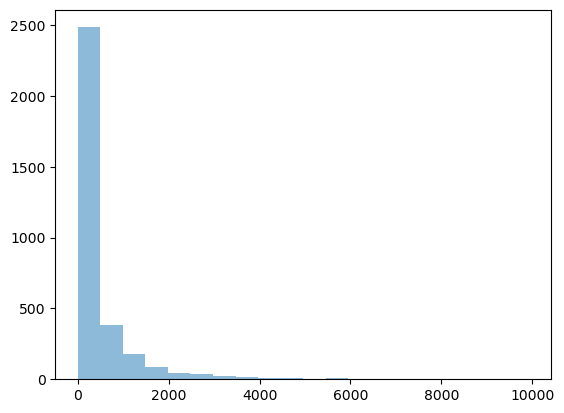

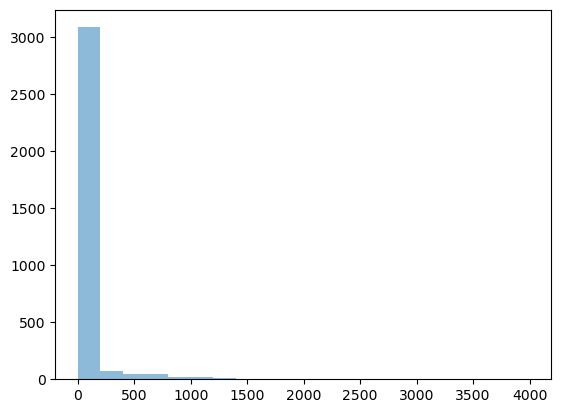

In [16]:
#ヒストグラムでみてみる
import matplotlib.pyplot as plt
#Transportedのデータをグループ化
grouped=df.groupby('Transported')

for group_name,group_data in grouped:
    plt.figure()
    plt.hist(group_data['RoomService'],bins=20,alpha=0.5,label='RoomService')
    plt.show()

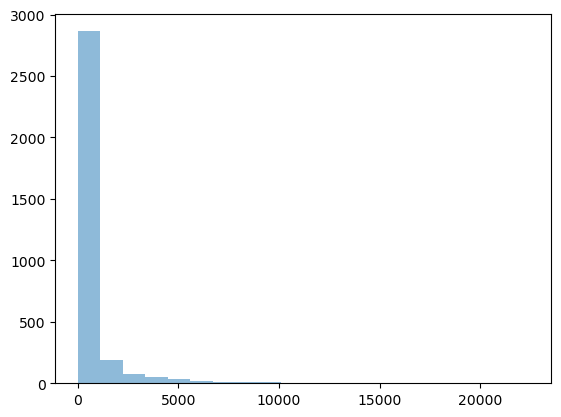

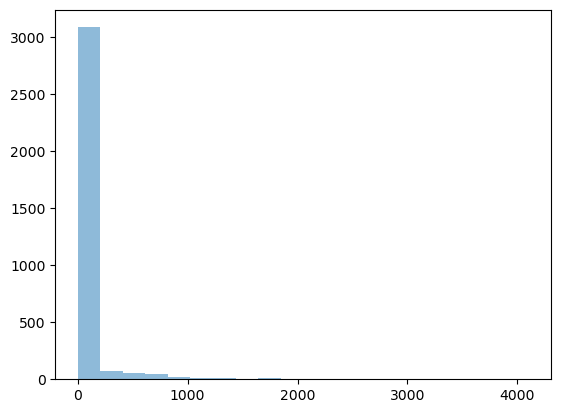

In [17]:
#ヒストグラムでみてみる
import matplotlib.pyplot as plt
#Transportedのデータをグループ化
grouped=df.groupby('Transported')

for group_name,group_data in grouped:
    plt.figure()
    plt.hist(group_data['Spa'],bins=20,alpha=0.5,label='Spa')
    plt.show()

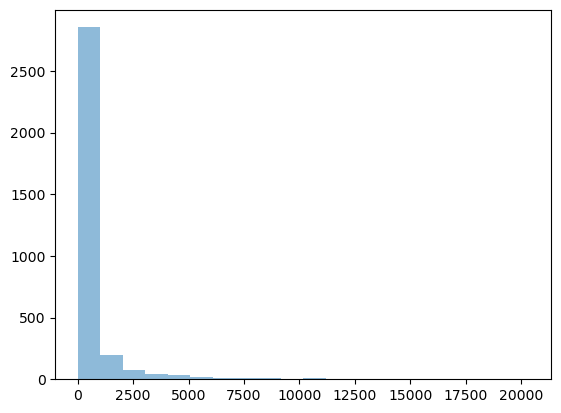

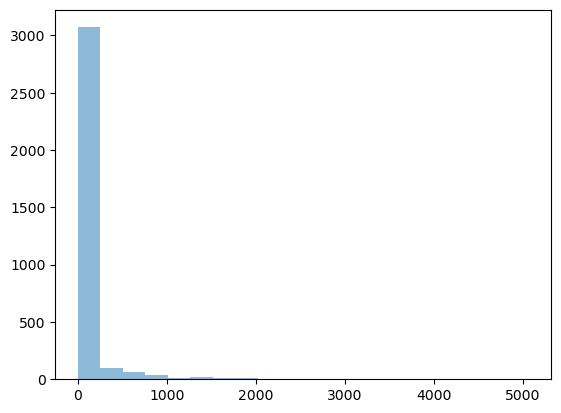

In [18]:
#ヒストグラムでみてみる
import matplotlib.pyplot as plt
#Transportedのデータをグループ化
grouped=df.groupby('Transported')

for group_name,group_data in grouped:
    plt.figure()
    plt.hist(group_data['VRDeck'],bins=20,alpha=0.5,label='VRDeck')
    plt.show()

どれも平均に近く分布していて、多く使っている人がいる。対数変換して見てみるのもありだと思う。

In [19]:
#質的変数(Transported)と質的変数を比較：クロス集計
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['CryoSleep'])
print(cross_tab)

CryoSleep    False  True 
Transported              
False         2852    427
True          1422   1905


CryoSleepしている人は転送されやすくなっている。
してない人は転送されていない人が多い

In [20]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['HomePlanet'])
print(cross_tab)

HomePlanet   Earth  Europa  Mars
Transported                     
False         2048     569   662
True          1518    1104   705


Earthから出発した乗客は転送されていない人が多い。
Europaからだと、転送された人が多い。
Marsは同数

In [21]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['Destination'])
print(cross_tab)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                531            308         2440
True                 876            315         2136


55 Cancri eに差が出ているくらい

In [22]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['VIP'])
print(cross_tab)

VIP          False  True 
Transported              
False         3177    102
True          3267     60


ほぼ同数

In [23]:
#データを"/"ごとに分ける
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [24]:
df=df.drop(labels='Cabin',axis=1)

In [25]:
#Cabin列がなくなって、Deck、Cabin_num,Sideが増えたことを確認
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [26]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['Deck'])
print(cross_tab)

Deck           A    B    C    D    E     F     G  T
Transported                                        
False        106  170  188  216  438  1215   945  1
True         101  458  399  158  245   937  1028  1


transportedがB,C,Gだとtrueが多い、D,E,Fだとfalseが多い

In [27]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['Cabin_num'])
print(cross_tab)

Cabin_num    0  1  10  100  1000  1001  1002  1003  1004  1005  ...  990  991  \
Transported                                                     ...             
False        7  3   5    3     3     1     1     1     0     0  ...    2    1   
True         5  9   5    7     2     2     2     1     3     2  ...    1    4   

Cabin_num    992  993  994  995  996  997  998  999  
Transported                                          
False          1    1    2    1    0    2    2    0  
True           1    1    5    1    1    0    1    4  

[2 rows x 1734 columns]


差が生まれにくい。変数が増えるだけなので削除する

In [28]:
#クロス集計を行う
cross_tab=pd.crosstab(df['Transported'],df['Side'])
print(cross_tab)

Side            P     S
Transported            
False        1794  1485
True         1467  1860


差がないようにも思えるけど、強いていうとpだとfalseになりやすくて、sだとtrueになりやすい

In [29]:
#Cabin_numは削除してしまう
df=df.drop(labels='Cabin_num',axis=1)

# ダミー変数に変換する

In [30]:
#カテゴリカル変数を含んだデータのみ抽出
df_obj=df.select_dtypes(include='object')
df_obj.head()

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side
0,Europa,False,TRAPPIST-1e,False,B,P
1,Earth,False,TRAPPIST-1e,False,F,S
2,Europa,False,TRAPPIST-1e,True,A,S
3,Europa,False,TRAPPIST-1e,False,A,S
4,Earth,False,TRAPPIST-1e,False,F,S


In [31]:
#それぞれ別のユニークな値の数
df_uni=df_obj.nunique()
#ユニークな値の数が2つの入力変数に対してLabel Encodingを適用
df_cols=df_uni[df_uni==2].index
df_cols

Index(['CryoSleep', 'VIP', 'Side'], dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
for col in df_cols:
    le=LabelEncoder()
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [33]:
#Encodingが完了していることを確認
df[df_cols].head()

,CryoSleep,VIP,Side
0,0,0,0
1,0,0,1
2,0,1,1
3,0,0,1
4,0,0,1


In [34]:
#その他のカテゴリをダミー変数に変換
df=pd.get_dummies(df,drop_first=True)

# ランダムフォレストで学習

In [35]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,...,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,0,0,1,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,0,1,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,1,...,0,0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,1,...,0,0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,0,1,0,0,0,0,1,0,0


In [36]:
#Transportedのbool型をint型に変換
df['Transported']=df['Transported'].astype(int)
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,...,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,1,0,0,0,0,1,0,0


In [37]:
#説明変数のデータをNumpy配列に格納
X = df.iloc[:, list(range(8)) + list(range(9, 21))].values
#目的変数のデータをNumpy配列に格納
y=df.iloc[:,8].values

In [38]:
from sklearn.model_selection import train_test_split
#説明変数のデータと目的変数のデータを8:2の割合で分割する
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.ensemble import RandomForestClassifier

#ランダムフォレスト分類のモデルを作成
model=RandomForestClassifier(random_state=0)
#モデルの訓練
model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [40]:
from sklearn.metrics import accuracy_score

#訓練データを学習済みモデルに入力して予測値を取得
y_train_pred=model.predict(X_train)
#テストデータを学習済みモデルに入力して予測値を取得
y_test_pred=model.predict(X_test)
#訓練データとテストデータの正解率を取得
acc_train=accuracy_score(y_train,y_train_pred)
acc_test=accuracy_score(y_test,y_test_pred)
#正解率を取得
print('acc_train',acc_train)
print('acc_test',acc_test)

acc_train 0.9524981074943225
acc_test 0.7866868381240545


若干過学習しています。

# テストデータを前処理する

In [41]:
test_df_1=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [42]:
test_df_1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [43]:
#PassengerIdとNameの列を削除して、Cabinは"/"ごとに分けてCabin列は削除する。
#passengerIdとNameの削除
test_df=test_df_1.drop(labels='PassengerId',axis=1)
test_df=test_df.drop(labels='Name',axis=1)
#データを"/"ごとに分ける
test_df[["Deck", "Cabin_num", "Side"]] = test_df["Cabin"].str.split("/", expand=True)
test_df=test_df.drop(labels='Cabin',axis=1)
#Cabin_numは削除してしまう
test_df=test_df.drop(labels='Cabin_num',axis=1)

In [44]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


In [45]:
#欠損値の確認
test_df.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Deck            100
Side            100
dtype: int64

In [46]:
#欠損値は分散の大きさによって平均か、中央値か、最頻値かを変更する
#RoomService,FoodCourt,ShoppingMall,Spa,VRDeckは分散が大きいので中央値をとる
#VIP,Deck,Sideはobjectなので最頻値に置き換える
#HomePlanet,CryoSleep,Destinationもobjectなので最頻値

In [47]:
#Ageは平均値
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [48]:
test_df.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Deck            100
Side            100
dtype: int64

# ダミー変数に変換

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
 10  Deck          4177 non-null   object 
 11  Side          4177 non-null   object 
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


In [50]:
#Ageをfloot型に変更
test_df['Age']=test_df['Age'].astype(float)

In [51]:
#カテゴリカル変数を含んだデータのみ抽出
test_df_obj=test_df.select_dtypes(include='object')
test_df_obj.head()
#それぞれ別のユニークな値の数
test_df_uni=test_df_obj.nunique()
#ユニークな値の数が2つの入力変数に対してLabel Encodingを適用
test_df_cols=test_df_uni[test_df_uni==2].index
test_df_cols
from sklearn.preprocessing import LabelEncoder
for col in df_cols:
    le=LabelEncoder()
    le.fit(test_df[col])
    test_df[col]=le.transform(test_df[col])
#その他のカテゴリをダミー変数に変換
test_df=pd.get_dummies(test_df,drop_first=True)

In [52]:
#残りの欠損値を中央値で補う
test_df.fillna(test_df.median(),inplace=True)

In [53]:
test_df.isnull().sum().sort_values(ascending=False)

CryoSleep                    0
Age                          0
Deck_G                       0
Deck_F                       0
Deck_E                       0
Deck_D                       0
Deck_C                       0
Deck_B                       0
Destination_TRAPPIST-1e      0
Destination_PSO J318.5-22    0
HomePlanet_Mars              0
HomePlanet_Europa            0
Side                         0
VRDeck                       0
Spa                          0
ShoppingMall                 0
FoodCourt                    0
RoomService                  0
VIP                          0
Deck_T                       0
dtype: int64

前処理終了

# テストデータの予測

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  6606 non-null   int64  
 1   Age                        6606 non-null   float64
 2   VIP                        6606 non-null   int64  
 3   RoomService                6606 non-null   float64
 4   FoodCourt                  6606 non-null   float64
 5   ShoppingMall               6606 non-null   float64
 6   Spa                        6606 non-null   float64
 7   VRDeck                     6606 non-null   float64
 8   Transported                6606 non-null   int64  
 9   Side                       6606 non-null   int64  
 10  HomePlanet_Europa          6606 non-null   uint8  
 11  HomePlanet_Mars            6606 non-null   uint8  
 12  Destination_PSO J318.5-22  6606 non-null   uint8  
 13  Destination_TRAPPIST-1e    6606 non-null   uint8

In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Side                       4277 non-null   int64  
 9   HomePlanet_Europa          4277 non-null   uint8  
 10  HomePlanet_Mars            4277 non-null   uint8  
 11  Destination_PSO J318.5-22  4277 non-null   uint8  
 12  Destination_TRAPPIST-1e    4277 non-null   uint8  
 13  Deck_B                     4277 non-null   uint8

In [56]:
prediction=model.predict(test_df)
prediction

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 1])

In [57]:
#予測結果を含むDataFrameを作成
submission_df=pd.DataFrame({
    'PassengerId':test_df_1['PassengerId'],
    'Transported':prediction.astype(bool)
})
#CSVファイルとして保存
submission_df.to_csv('submission.csv',index=False)

In [58]:
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
